# Fully connected neural networks

<u>On kooplex tensorflow 2 does not work, please work on Google Colab and then upload your solution to kooplex! Also, on Google Colab you can use GPUs</u>


This week we will use the MNIST handwritten digits dataset! The weights.npy file is provided, which contains the weight vector for a traines fully connected neural network.

In [1]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
import tensorflow

from sklearn.metrics import confusion_matrix
import seaborn as sns

import tqdm

from sklearn.metrics import accuracy_score

#importing the dataset

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [2]:
#loading the weights and biases

w = np.load('weights.npy', allow_pickle=True)

#reshaping the dataset

x_train = x_train.reshape(60000, 28*28)/255
x_test = x_test.reshape(10000, 28*28)/255

#transforming to categorical values

y_train_oh = keras.utils.to_categorical(y_train)
y_test_oh = keras.utils.to_categorical(y_test)

## 1 - 2. Implement fully connected neural network via using only numpy

In this task we need to implement a small fully connected neural network that can generate predictions for us if we provide the weights and the input data!

 - implement the following function:
 ```python
 def pred_nn(weights, x_test):
    ...
    return predictions
 ```
 - x_test has a shape of (N_samples, 784)
 - predictions has a shape of (N_samples, 10)
 - then function implements a fully connected neural network with the follwing layers:
    - 750 neuron, relu activation
    - 500 neuron, relu activation
    - 500 neuron, relu activation
    - 10 neuron, softmax activation
 - weights is a numpy array of the weights
    - 1st element is a shape of (784, 750), 2nd is (750,), the bias
    - 3rd element is a shape of (750, 500), 4th is (500,)
    ... the rest matches the weight dimensions of the above-mentioned architecture
 - use numpy's built-in vectorized operations, try not to write for loops!
    
An optimally implemented function runs < 1s for N_samples = 10.000 

In [3]:
#creating the manual NN

def pred_nn(w, x_test):
    
    #creating the predictions
    
    x1 = np.matmul(x_test, w[0]) + w[1]
    x1[x1<0]=0

    x2 = np.matmul(x1, w[2]) + w[3]
    x2[x2<0]=0

    x3 = np.matmul(x2, w[4]) + w[5]
    x3[x3<0]=0

    x4 = np.matmul(x3, w[6]) + w[7]
    e = np.exp(x4)
    result =  e / e.sum()
    
    return result

## 3.  Same architecture via tensorflow/keras

 - Implement the same architecture with tensorflow/keras as we did in 1-2). 
 - Load the provided weights for the neural network!

In [4]:
#creating the model with keras

model = keras.Sequential()

#loading the weights from the np.array

model.add(keras.layers.Dense(750, activation='relu', input_dim=784))
model.layers[0].set_weights([w[0],w[1]])

model.add(keras.layers.Dense(500, activation='relu'))
model.layers[1].set_weights([w[2],w[3]])

model.add(keras.layers.Dense(500, activation='relu'))
model.layers[2].set_weights([w[4],w[5]])

model.add(keras.layers.Dense(10, activation='softmax'))
model.layers[3].set_weights([w[6],w[7]])


#checking the parameters

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 750)               588750    
_________________________________________________________________
dense_1 (Dense)              (None, 500)               375500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
Total params: 1,219,760
Trainable params: 1,219,760
Non-trainable params: 0
_________________________________________________________________


## 4-5. Compate performances
 - load the MNIST dataset from the tensorflow/keras built-in dataset
 - use the original train/test split!
 - divide each pixel's value by 255 & reshape to have 1D input vector (784) instead of the 2D matrix (28x28)
   - eg for the test set you will have a (10000, 784) shaped vector
 - generate prediction for the 10.000 test images with both methods!
 - calculate the categorical cross-entropy loss and the accuracy for both methods! are they the same? (if not, it indicates a bug somewhere...) Hint: you should get ~97% accuracy
 - show the confusion matrix of the predictions (predicted values vs actual labels)
 - where does the model make mistakes?

### First method: the custom neural network

In [5]:
#calling the function

custom_nn_pred = pred_nn(w, x_test)

#creating the predictions as classes

predicted_classes_cust = []

for i in range(0,len(custom_nn_pred)):

    ind = list(custom_nn_pred[i]).index(np.max(custom_nn_pred[i]))
    predicted_classes_cust.append(ind)
    
#creating the confusion matrix    

confusion_matrix_values_custom = confusion_matrix(y_test, predicted_classes_cust)

### Second method: The keras neural network

In [6]:
#compiling the model

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-2), metrics=['accuracy'])

#### Calculating the predictions

In [7]:
#predicting the values

predictions = model.predict(x_test)
predicted_classes = model.predict_classes(x_test)

#creating the values for the confusion matrix

confusion_matrix_values_keras = confusion_matrix(y_test, predicted_classes)

#### Creating the confusion matrices

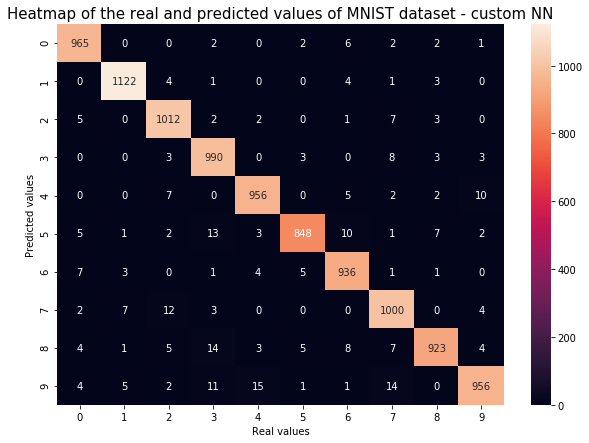

In [8]:
plt.subplots(figsize=(10,7))

x_axis_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
y_axis_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

p1 = sns.heatmap(confusion_matrix_values_custom, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, fmt="d")

plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Heatmap of the real and predicted values of MNIST dataset - custom NN', fontsize=15)

plt.show()

#### Plotting the confusion matrix

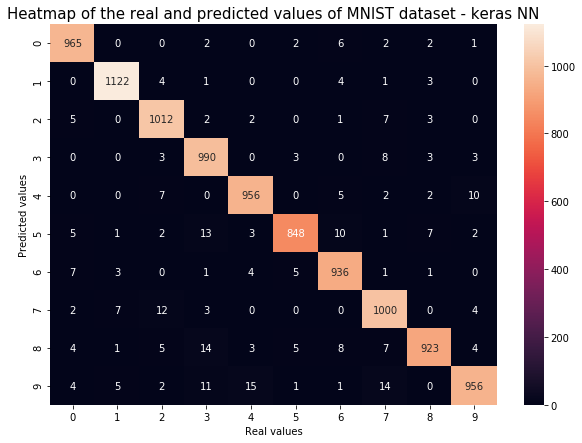

In [9]:
plt.subplots(figsize=(10,7))

x_axis_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
y_axis_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

p1 = sns.heatmap(confusion_matrix_values_keras, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, fmt="d")

plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Heatmap of the real and predicted values of MNIST dataset - keras NN', fontsize=15)

plt.show()

### Results

As it's seen, the confusion matrices are the same. Let's notice, that there are more than average mistakes in the predictions at the cases of:
 - 7 - 9 - they are very similar in the way they are written
 - 3 - 9 - they are both spheric on their right parts
 - 4 - 9 
 - 5 - 3 - quite similar in their lower part
 - 8 - 3 - 3 is basically a half 8, so they are quite similar
 
This was a brief explanation of the mistakes I found in the predictions. I couldn't see why the NN would mistake the fours to nines. Let's check out the accuracies and the crossentropies now!

In [10]:
acc_cust_nn = accuracy_score(y_test, predicted_classes_cust)
acc_keras = accuracy_score(y_test, predicted_classes)

print('The accuracy for the manually built NN:', round(acc_cust_nn,6))
print('The accuracy for the keras NN:', round(acc_keras,6))

The accuracy for the manually built NN: 0.9708
The accuracy for the keras NN: 0.9708


As it's seen, the accuracies are the same. What about the crossentropy? First we need to call the function which calculates it!

In [11]:
#categorical corrsentropy function

cce = tensorflow.keras.losses.CategoricalCrossentropy()

#calculating it for the different NN

custom_nn_cce = cce(y_test_oh, custom_nn_pred).numpy()
keras_nn_cce = cce(y_test_oh, predictions).numpy()

#printing the results

print('The categorical crossentropy for the manually built NN is:', round(custom_nn_cce,6))
print('The categorical crossentropy for the keras NN is:', round(custom_nn_cce,6))

The categorical crossentropy for the manually built NN is: 0.095857
The categorical crossentropy for the keras NN is: 0.095857


As it's seen, they are the same, which concludes this homework.